<a href="https://colab.research.google.com/github/bala-baskar/deep_learning_path/blob/main/courses/IITM_CS7015_Deep%20learning/Gradient_Descent_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import seaborn as sns

# Gradient descent algorithm

In [41]:
x = [0.5,2.5]
y = [0.2,0.9]

In [42]:
def sigmoid(w,b,x):
  return 1 / (1 + np.exp(-(w*x + b)))

def grad_w(w,b,x,y):
  return (sigmoid(w,b,x) - y) * sigmoid(w,b,x) * (1 - sigmoid(w,b,x)) * x

def grad_b(w,b,x,y):
  return (sigmoid(w,b,x) - y) * sigmoid(w,b,x) * (1 - sigmoid(w,b,x))

def f_x(W, B, x):
  return sigmoid(W,B,x)

In [43]:
w,b = -3,4
eta = 1.0
path_w, path_b, path_error = [],[],[]
epoch = 1000
for i in range(epoch):
  dw, db = 0, 0
  error = []
  for idx in range(len(x)):
    y_hat = sigmoid(w,b,x[idx])
    err = 1/2 * (y_hat - y[idx])**2
    error.append(err)
    dw += grad_w(w,b,x[idx],y[idx])
    db += grad_b(w,b,x[idx],y[idx])
  w = w - eta*dw
  b = b - eta*db
  # print(f"Iteration {i}: Error {np.sum(error)}, parameter (w,b) - {w,b}")
  path_w.append(w)
  path_b.append(b)
  path_error.append(np.sum(error))


In [44]:
@interact(idx=(0,epoch))
def interactive_plot(idx):

  %matplotlib inline
  # Example: Define a grid for w and b
  w = np.linspace(-6, 6, 1000)
  b = np.linspace(-6, 6, 1000)
  W, B = np.meshgrid(w, b)
  error = 0.5 * ((f_x(W,B,0.5) - 0.2)**2 + (f_x(W,B,2.5) - 0.9)**2)
  # Create a 3D figure
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')

  # Plot the surface
  surf = ax.plot_surface(W, B, error, cmap='coolwarm', edgecolor='none', alpha=0.9)

  # Add a color bar
  fig.colorbar(surf, shrink=0.5, aspect=5, label='Error')

  # Label axes
  ax.set_xlabel('w')
  ax.set_ylabel('b')
  ax.set_zlabel('error')
  ax.set_zlim(-1, 1)
  ax.set_title('Gradient Descent on the Error Surface')

  # Plot the path on top of the surface
  ax.plot(path_w[:idx], path_b[:idx], path_error[:idx], color='red', marker='o', linewidth=1, markersize=1.5, label='Descent Path')
  ax.plot(path_w[:idx], path_b[:idx], -1, color='black', marker='o', linewidth=1, markersize=1.5, label='Parameter Contour path')

  # Optionally add a legend
  ax.legend()

  # Adjust the viewing angle for better presentation
  ax.view_init(elev=15, azim=-18)

  plt.tight_layout()
  plt.show()


interactive(children=(IntSlider(value=500, description='idx', max=1000), Output()), _dom_classes=('widget-inte…

# Representing Tower function

In [45]:
# Role of w,b in sigmoid function

def sigmoid(w,b,x=0.5):
  return 1/(1 + np.exp(-w*x + b))

In [46]:
@interact(w=(0,100),b=(0,100))
def plot_sigmoid(w,b):
  x = np.linspace(-5,5,1000)
  y = sigmoid(w=w,b=b,x=x)
  sns.lineplot(x=x,y=y,color='red')
  plt.title("Role of w,b in Sigmoid function")
  plt.show()

interactive(children=(IntSlider(value=50, description='w'), IntSlider(value=50, description='b'), Output()), _…

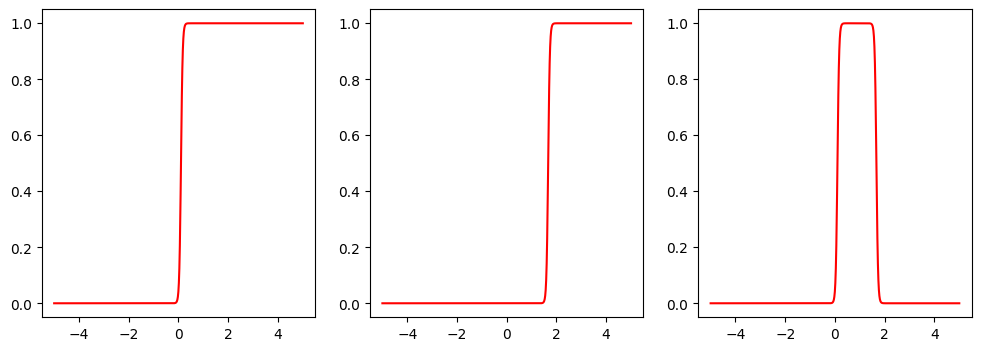

In [47]:
x = np.linspace(-5,5,1000)
y1 = sigmoid(w=30,b=3,x=x)
y2 = sigmoid(w=30,b=50,x=x)
y3 = y1 - y2
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].plot(x,y1,color='red')
ax[1].plot(x,y2,color='red')
ax[2].plot(x,y3,color='red')

### Tower function in 3D

In [48]:
def sigmoid(w1,w2,b,x1,x2):
  return 1/(1 + np.exp(-(w1*x1+w2*x2+b)))

In [49]:
x1 = np.linspace(-10,10,1000)
x2 = np.linspace(-10,10,1000)
w2 = 0
w1 = np.linspace(0,10,1000)
y = sigmoid(w1=w1,w2=w2,b=2,x1=x1,x2=x2)

<ipython-input-50-30f782e2eb29>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


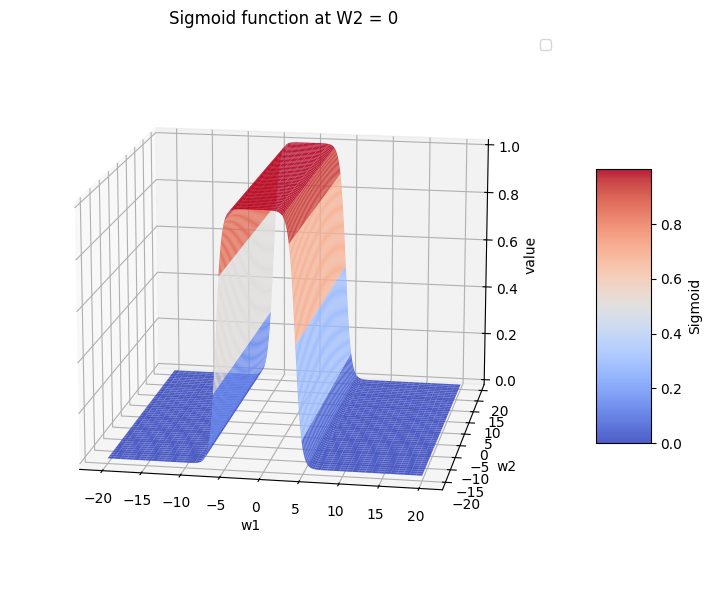

In [50]:
# Example: Define a grid for w and b
w1 = np.linspace(-20,20,1000)
w2 = np.linspace(-20,20,1000)
W1, W2 = np.meshgrid(w1, w2)
sigmoid_fn1 = 1/(1 + np.exp(-(W1*2.5+0*0.5+15)))
sigmoid_fn2 = 1/(1 + np.exp(-(W1*2.5+0*0.5-10)))
# sigmoid_fn2 = 1/(1 + np.exp(-(0*2.5+W2*2.5+0)))
# Create a 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(W1, W2, sigmoid_fn1 - sigmoid_fn2, cmap='coolwarm', edgecolor='none', alpha=0.9)

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5, label='Sigmoid')

# Label axes
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('value')
# ax.set_zlim(-1, 1)
ax.set_title('Sigmoid function at W2 = 0')

# Optionally add a legend
ax.legend()

# Adjust the viewing angle for better presentation
ax.view_init(elev=15, azim=-80)

plt.tight_layout()
plt.show()

<ipython-input-51-1f852049e99a>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


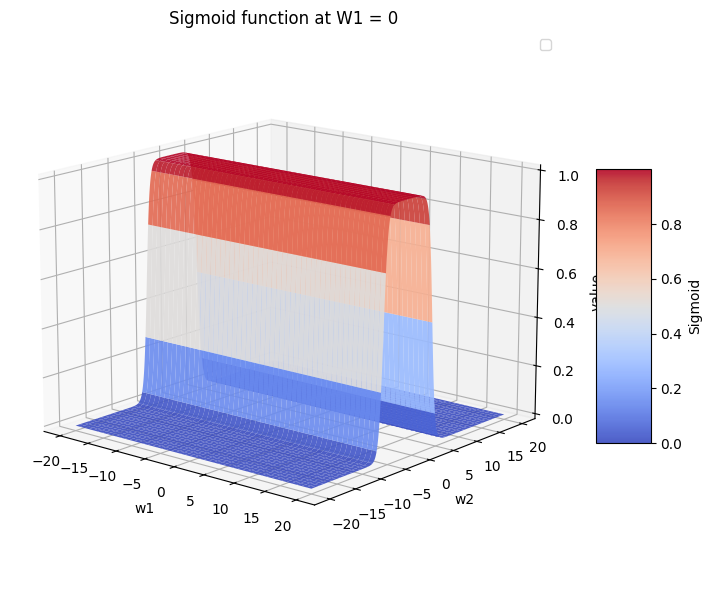

In [51]:
# Example: Define a grid for w and b
w1 = np.linspace(-20,20,1000)
w2 = np.linspace(-20,20,1000)
W1, W2 = np.meshgrid(w1, w2)
sigmoid_fn1 = 1/(1 + np.exp(-(0*0.5+W2*2.5+15)))
sigmoid_fn2 = 1/(1 + np.exp(-(0*0.5+W2*2.5-10)))
# sigmoid_fn2 = 1/(1 + np.exp(-(0*2.5+W2*2.5+0)))
# Create a 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(W1, W2, sigmoid_fn1 - sigmoid_fn2, cmap='coolwarm', edgecolor='none', alpha=0.9)

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5, label='Sigmoid')

# Label axes
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('value')
# ax.set_zlim(-1, 1)
ax.set_title('Sigmoid function at W1 = 0')

# Optionally add a legend
ax.legend()

# Adjust the viewing angle for better presentation
ax.view_init(elev=15, azim=-50)

plt.tight_layout()
plt.show()

<ipython-input-52-06635298da84>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


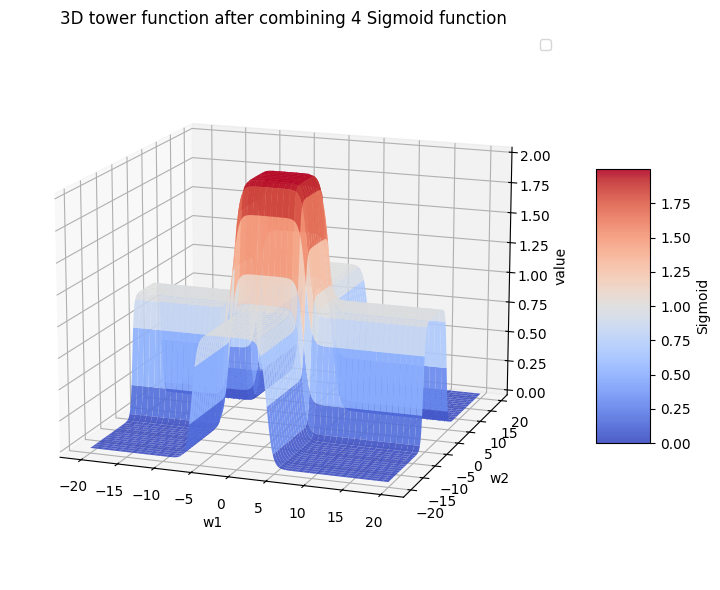

In [52]:
# Example: Define a grid for w and b
w1 = np.linspace(-20,20,1000)
w2 = np.linspace(-20,20,1000)
W1, W2 = np.meshgrid(w1, w2)
sigmoid_fn1 = 1/(1 + np.exp(-(W1*2.5+0*0.5+15)))
sigmoid_fn2 = 1/(1 + np.exp(-(W1*2.5+0*0.5-10)))
sigmoid_fn3 = 1/(1 + np.exp(-(0*0.5+W2*2.5+15)))
sigmoid_fn4 = 1/(1 + np.exp(-(0*0.5+W2*2.5-10)))
# sigmoid_fn2 = 1/(1 + np.exp(-(0*2.5+W2*2.5+0)))
# Create a 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(W1, W2, (sigmoid_fn1 - sigmoid_fn2) + (sigmoid_fn3 - sigmoid_fn4), cmap='coolwarm', edgecolor='none', alpha=0.9)

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5, label='Sigmoid')

# Label axes
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('value')
# ax.set_zlim(-1, 1)
ax.set_title('3D tower function after combining 4 Sigmoid function')

# Optionally add a legend
ax.legend()

# Adjust the viewing angle for better presentation
ax.view_init(elev=15, azim=-70)

plt.tight_layout()
plt.show()